In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.collections as mcol

from matplotlib.lines import Line2D


# File to Load (Remember to change these)
city_data_to_load = "Desktop/city_data.csv"
ride_data_to_load = "Desktop/ride_data.csv"

# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
merge_table = pd.merge(city_df, ride_df, on="city", how="outer")
merge_table.head()







,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [2]:
#dictionary

temp_dict_list = []
for city in merge_table["city"].unique():
    temp_dict = {"City Name": merge_table.loc[merge_table["city"]==city]["city"].max(),
                "City Type": merge_table.loc[merge_table["city"]==city]["type"].max(),
                "Driver Count": merge_table.loc[merge_table["city"]==city]["driver_count"].max(),
                "Average Fare": merge_table.loc[merge_table["city"]==city]["fare"].mean(),
                "Total Fare": merge_table.loc[merge_table["city"]==city]["fare"].sum(),
                "Ride Count": merge_table.loc[merge_table["city"]==city]["ride_id"].count()}
    temp_dict_list.append(temp_dict)
CityRideSummary = pd.DataFrame(temp_dict_list)
CityRideSummary.head()


,Average Fare,City Name,City Type,Driver Count,Ride Count,Total Fare
0,22.373214,Richardfort,Urban,38,28,626.45
1,24.362174,Williamsstad,Urban,59,23,560.33
2,23.836842,Port Angela,Urban,67,19,452.90
3,28.616957,Rodneyfort,Urban,34,23,658.19
4,25.123871,West Robert,Urban,39,31,778.84


## Bubble Plot of Ride Sharing Data

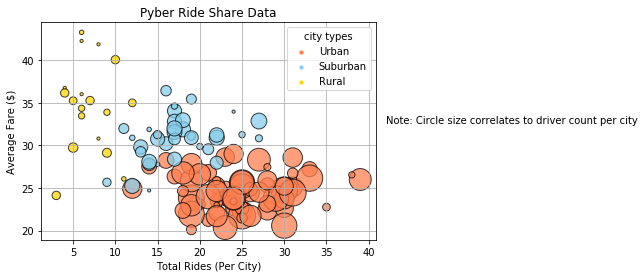

In [3]:
# Obtain the x and y coordinates for each of the three city types
x_axis = CityRideSummary["Ride Count"]
y_axis = CityRideSummary["Average Fare"]
size = (CityRideSummary["Driver Count"]*10)
labels = [['Urban', 'coral'], ['Suburban', 'skyblue'], ['Rural', 'gold']]
colors = []

for color in CityRideSummary["City Type"]:
    if color=="Urban":
        colors.append("coral")
    elif color=="Suburban":
        colors.append("skyblue")
    elif color=="Rural":
        colors.append("gold")
        
# Build the scatter plots for each city types
#plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
#, s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)
#shabbawackydingdong



plt.scatter(x_axis, y_axis, marker="o", color=colors, edgecolors="black", s=size, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Share Data")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
# Create a legend
#adjust the area???!!@#@!!@#
for area in labels:
    plt.scatter([], [], c=area[1], alpha=1, s=10, label=area[0])
    
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, title='city types')

# Incorporate a text label regarding circle size
plt.text(42, 33, 'Note: Circle size correlates to driver count per city', ha='left', va='center', wrap=True)

# Save Figure
plt.savefig("PyberRide.png")
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents
CityTypePercent = CityRideSummary.groupby(["City Type"])["Total Fare", "Ride Count", "Driver Count"].sum()
CityTypePercent.head()


,Total Fare,Ride Count,Driver Count
City Type,,,
Rural,4327.93,125,78
Suburban,19356.33,625,490
Urban,39854.38,1625,2405


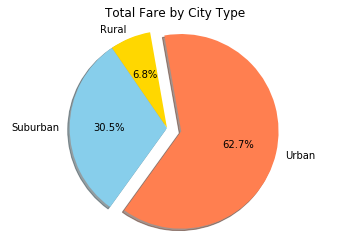

In [5]:
# Build Pie Chart

sizes = CityTypePercent["Total Fare"]
explode = (0, 0, 0.15)
labels2 = ["Rural", "Suburban", "Urban"]
colors2 = ["gold", "skyblue", "coral"]
plt.pie(sizes, explode=explode, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.title("Total Fare by City Type")
# Save Figure

plt.savefig("PyberTotalFares.png")

plt.show()

## Total Rides by City Type

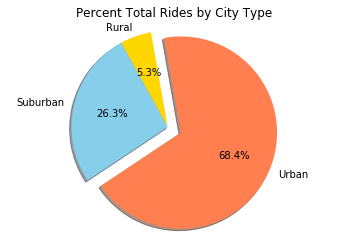

In [6]:
# Calculate Ride Percents

sizes = CityTypePercent["Ride Count"]
explode = (0, 0, 0.15)
labels2 = ["Rural", "Suburban", "Urban"]
colors2 = ["gold", "skyblue", "coral"]
plt.pie(sizes, explode=explode, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")

plt.title("Percent Total Rides by City Type")

# Build Pie Chart
# Save Figure
plt.savefig("PyberTotalRides.png")
plt.show()

## Total Drivers by City Type

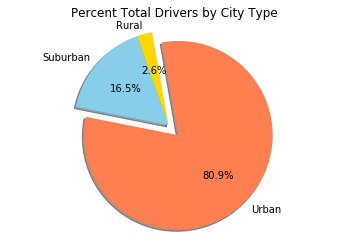

In [7]:
# Calculate Driver Percents

sizes = CityTypePercent["Driver Count"]
explode = (0, 0, 0.15)
labels2 = ["Rural", "Suburban", "Urban"]
colors2 = ["gold", "skyblue", "coral"]
plt.pie(sizes, explode=explode, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")

plt.title("Percent Total Drivers by City Type")

# Build Pie Chart
# Save Figure
plt.savefig("PyberTotalDrivers.png")
plt.show()